In [81]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline
# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [82]:
credit=pd.read_csv(r"C:\Users\vijay\Downloads\creditcard.csv")

In [83]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [84]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [85]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [86]:
credit.shape

(284807, 31)

In [87]:
credit.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
193753,130278.0,-3.904606,1.412054,-2.231527,0.048018,0.403364,-1.117429,-0.424876,-3.609377,1.389504,1.041422,-0.349945,-0.041701,-0.176250,-1.352237,0.975681,0.250530,0.433096,0.528179,-0.114555,-1.289610,-1.252227,1.597638,0.983235,-0.023440,-0.305411,-0.401914,-2.839216,-0.691617,1.50,0
42846,41271.0,1.132045,-0.073536,1.172994,1.147711,-0.741022,0.319059,-0.651947,0.244578,0.615576,-0.040245,0.658794,1.198650,0.262180,-0.233535,-0.526100,0.358118,-0.632688,0.508627,0.199833,-0.094628,-0.028973,0.099323,-0.060827,0.020753,0.437088,-0.407278,0.069779,0.025492,9.99,0
30393,35903.0,1.079409,-0.809440,0.652066,-0.895235,-1.066105,0.154818,-0.872392,0.380203,1.929255,-0.907736,0.785325,0.258270,-2.156999,0.453639,1.096331,-0.351751,-0.126790,0.776161,0.525877,-0.158380,0.202644,0.638848,-0.177772,-0.318725,0.475617,-0.497005,0.083182,0.020825,55.00,0
148099,89398.0,-2.458345,-2.964224,2.437326,0.425779,2.571572,1.687082,-2.791144,1.392652,1.517529,-0.786104,-0.319746,1.064997,-0.317186,-0.982998,-1.324719,-0.897174,0.568912,-0.281669,0.097579,0.629348,0.450726,1.006083,0.294732,-0.879406,-0.244210,0.618392,0.125173,0.179273,30.00,0
36928,38735.0,-0.827852,0.917587,1.828090,1.359392,0.193209,-0.027906,0.308075,-0.902861,0.020840,0.115339,-0.476125,-0.549935,-1.702163,0.134234,0.426370,-1.329273,0.810796,-0.635648,0.680087,-0.273848,0.698718,-0.098773,-0.169737,0.383309,-0.001080,-0.239023,-0.087240,-0.112544,1.00,0
43667,41601.0,1.202378,-0.205431,0.357600,0.062081,-0.967324,-1.418867,-0.047631,-0.150438,0.525785,-0.151068,-0.298690,-0.865844,-2.270193,0.755833,1.280007,0.229491,-0.012770,-0.481319,0.047103,-0.152315,-0.213068,-0.812243,0.145781,0.705637,0.036082,0.830154,-0.109104,0.009255,40.85,0
34009,37470.0,1.110520,-0.150151,0.971912,0.454693,-0.808242,-0.095367,-0.577152,0.253401,0.260401,0.050421,1.636022,0.559093,-0.907547,0.476817,0.960952,0.470614,-0.373334,-0.058059,-0.433336,-0.151620,-0.003299,-0.074961,0.142834,0.211299,-0.028106,0.321318,-0.009368,0.012819,14.99,0
209950,137785.0,1.846179,-0.681481,-0.134653,0.547918,-0.827951,-0.016503,-0.808115,0.116690,1.332822,-0.009127,-0.997398,0.186735,0.006146,-0.246800,0.800717,0.685119,-0.687175,0.145436,-0.373878,-0.038817,0.052653,0.106916,0.288657,0.737092,-0.544772,0.128159,-0.010711,-0.015768,76.41,0
74789,55756.0,1.304284,-1.400041,0.451003,-1.044812,-1.752465,-0.721590,-0.878464,-0.180173,-1.439656,1.257167,-0.871241,-0.791048,0.036013,-0.547389,-0.572112,-0.871332,0.947375,-0.368943,0.148157,-0.172035,-0.344911,-0.683730,-0.017775,0.373672,0.364405,-0.278910,0.020521,0.036440,112.27,0
218245,141233.0,-0.823484,0.937782,0.567395,0.134884,1.124884,-0.911924,2.501501,-0.659931,-1.237905,-0.563470,-0.729611,-0.288002,-0.009232,0.467803,-0.042169,-0.575695,-0.522210,-0.356960,-0.501760,0.268215,0.168123,0.390390,-0.358570,-0.018745,1.301530,-0.393127,-0.216906,-0.174140,144.00,0


In [88]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [89]:
credit.isnull().values.any()

False

In [90]:
credit_dup=credit[credit.duplicated(keep='last')]
credit_dup

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282986,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283482,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283484,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [91]:
credit['V15'].value_counts()

V15
 1.124147    77
 1.275257    77
 0.271957    62
 1.446627    60
 0.583897    53
             ..
 0.369308     1
-0.720932     1
 1.259754     1
 0.946766     1
 0.041333     1
Name: count, Length: 275653, dtype: int64

In [92]:
credit['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [93]:
credit['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [94]:
credit[['Time','Class','Amount']].describe()

,Time,Class,Amount
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.001727,88.349619
std,47488.145955,0.041527,250.120109
min,0.000000,0.000000,0.000000
25%,54201.500000,0.000000,5.600000
50%,84692.000000,0.000000,22.000000
75%,139320.500000,0.000000,77.165000
max,172792.000000,1.000000,25691.160000


<Axes: xlabel='Class'>

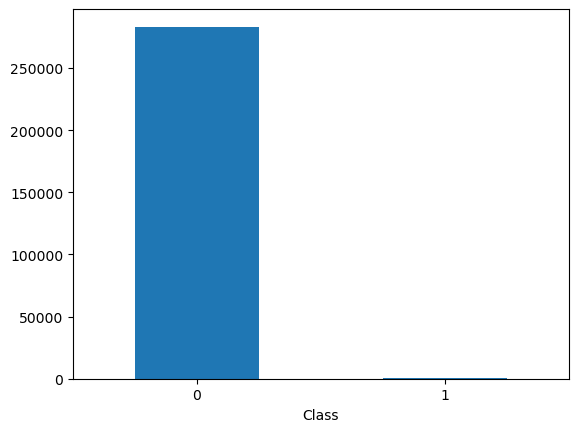

In [283]:
classes=pd.value_counts(credit['Class'])
classes.plot(kind='bar',rot=0)

<Axes: xlabel='Time', ylabel='Density'>

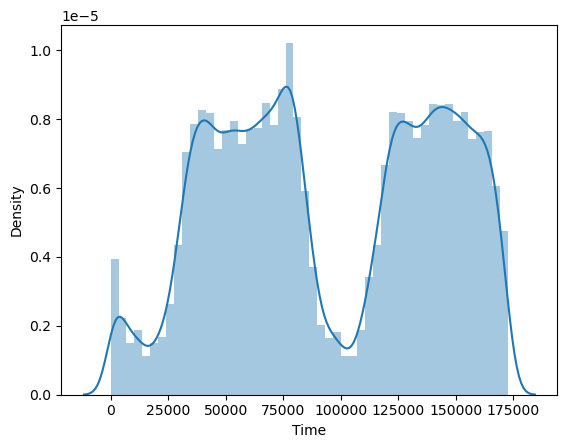

In [96]:
sns.distplot(credit['Time'])

In [97]:
fraud=credit[credit['Class']==1]
valid=credit[credit['Class']==0]
fraudper=(len(fraud)/len(valid))*100
print("Fraud Transactions: " ,len(fraud))
print("Valid Transactions: ",len(valid))
print("Fraud percentage: {}%" .format(round(fraudper, 3)))

Fraud Transactions:  492
Valid Transactions:  284315
Fraud percentage: 0.173%


In [98]:
print(fraud.shape)
print(valid.shape)

(492, 31)
(284315, 31)


In [99]:
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [100]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [101]:
#Mean of both transactions(valid / fraud)
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


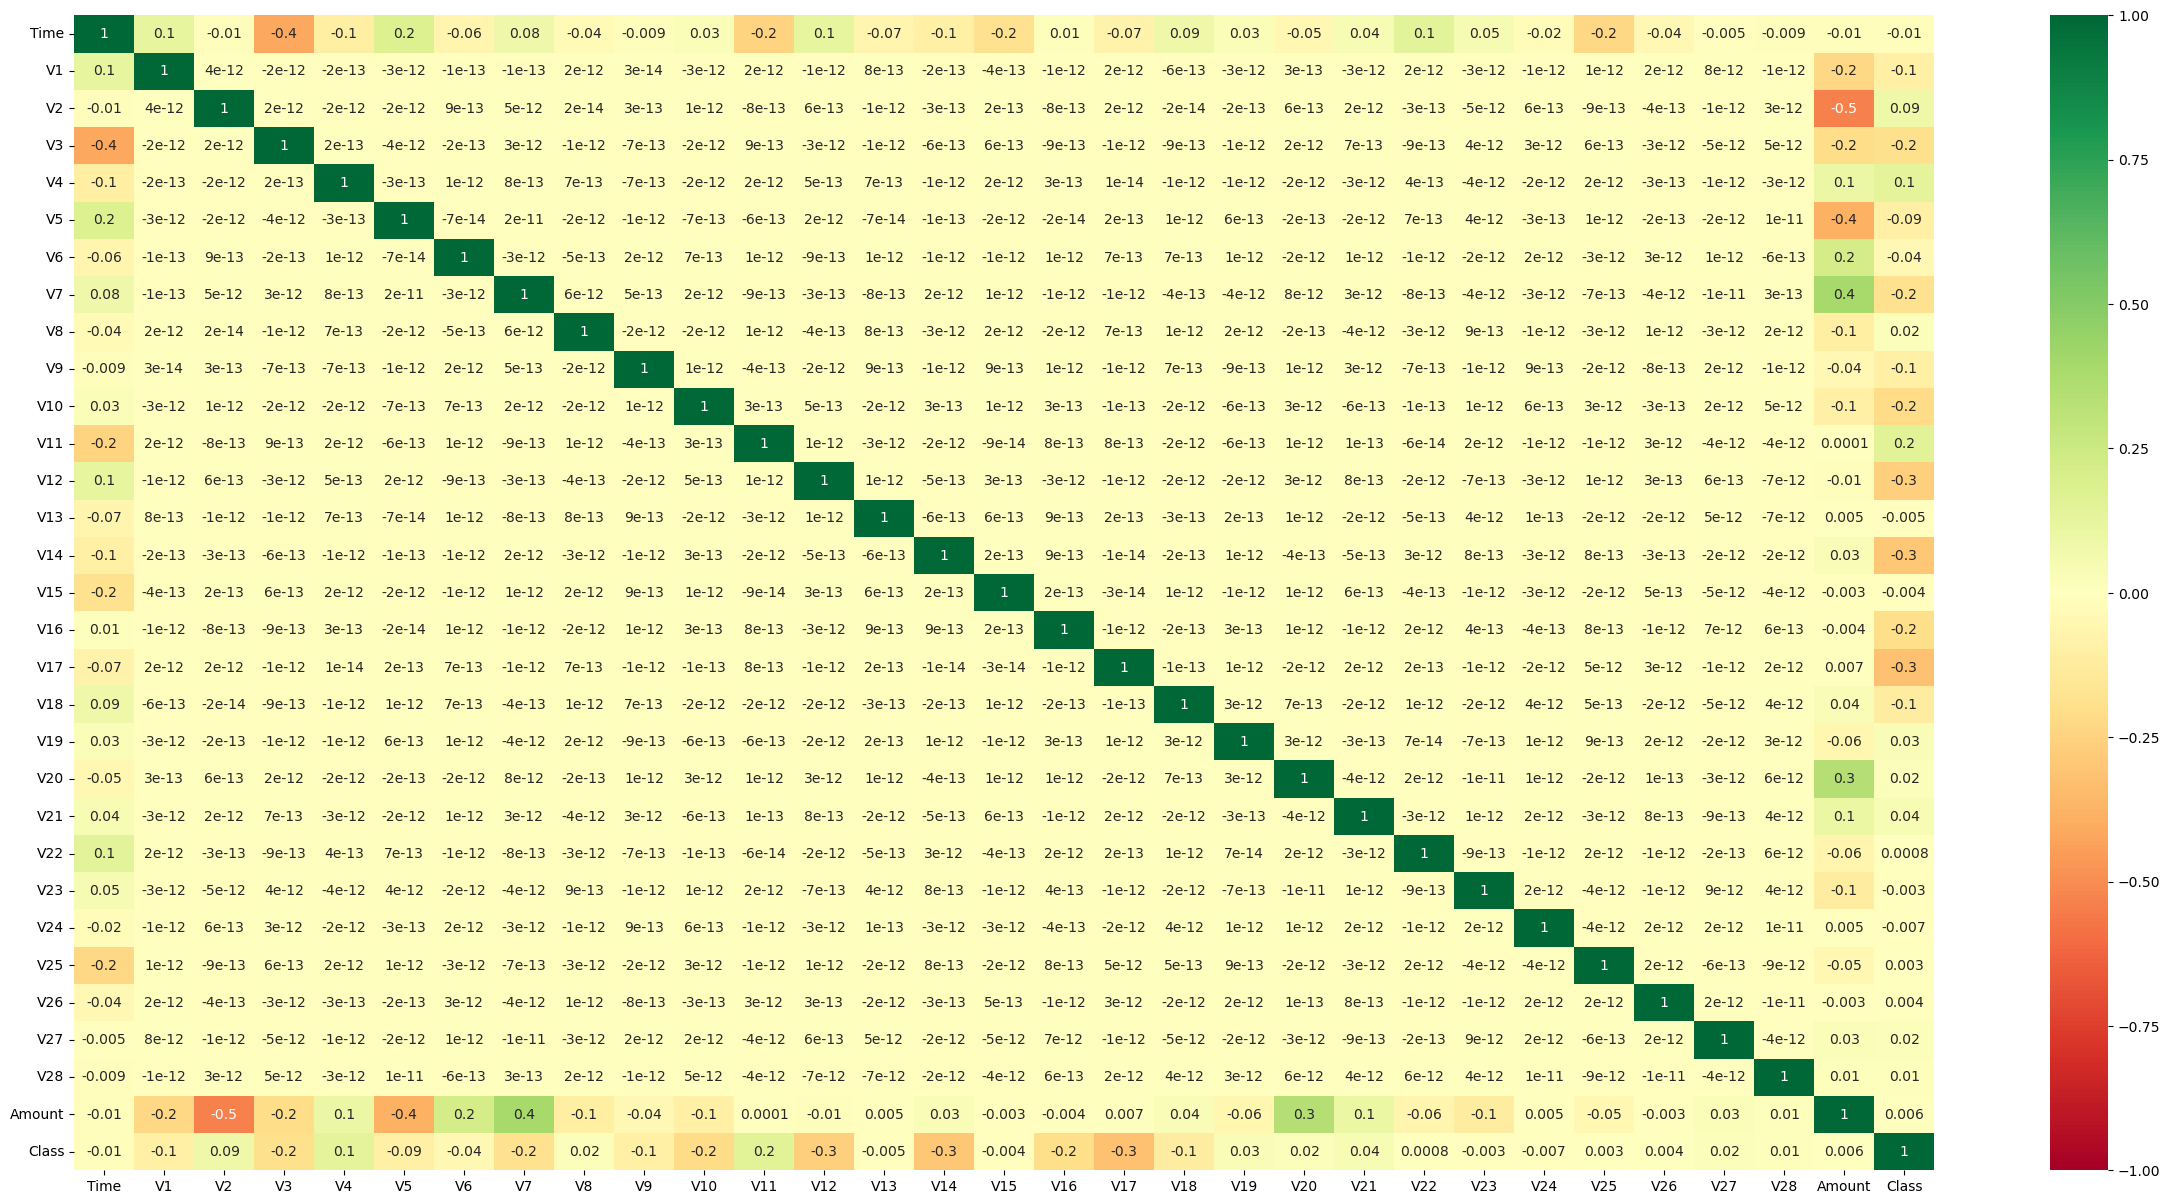

In [102]:
corr = credit.corr(method='pearson')
figure = plt.figure(figsize=(30,15))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="RdYlGn", center=0, annot=True, fmt='.1g')
plt.show()

# Under-Sampling

In [103]:
valid_sample = valid.sample(n=492)

In [104]:
#concatenating two dataframes[1.valid 2.fraud](axis=0 means rows)
new_dataset = pd.concat([valid_sample, fraud], axis=0)

In [105]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
277349,167602.0,-3.117949,3.142135,-2.710151,-0.692116,-1.142694,-1.167038,-0.978528,2.073437,0.263868,0.768337,-0.268233,0.906223,-0.627800,1.897155,-0.213679,0.365263,-0.010142,0.953643,0.267677,0.070562,0.412873,1.150893,0.253109,-0.349297,-0.367315,-0.183187,0.407889,0.330377,0.89,0
276756,167280.0,-7.471195,6.762856,-4.166503,-2.143484,-1.263792,-1.337328,0.122649,0.985307,5.747929,8.915025,-0.747032,-0.220449,-0.880236,-1.217543,1.053492,-0.917408,-0.576676,-0.083453,-0.749275,3.571773,-0.680208,0.746931,0.257706,0.547643,0.556545,-0.387773,0.902090,-0.641602,0.89,0
102905,68420.0,-2.215307,1.404438,0.045996,0.994980,0.494482,0.499316,0.241397,0.118305,0.146405,-0.215242,-1.024214,0.448830,1.259765,-1.580208,0.397275,-0.228098,1.056809,-0.079480,0.770419,-0.483473,-0.166082,-0.482961,-0.581197,-1.002174,-0.247888,-0.511607,-0.972420,0.016115,60.37,0
254567,156796.0,1.949558,0.142905,-2.583598,0.429091,0.925939,-1.044792,0.756329,-0.381164,-0.265479,-0.240533,1.371906,1.005123,0.358993,-0.633255,-0.929117,-0.045840,0.613689,0.239186,0.196669,0.004250,0.122976,0.387032,-0.087948,0.757505,0.359902,0.649040,-0.114320,-0.046808,66.65,0
51811,45129.0,-3.035730,-3.620910,-0.693223,-1.511104,-4.489085,1.722356,4.338491,0.183823,0.803041,-3.173125,0.323067,1.287271,0.326738,0.010932,-1.227947,0.047015,-0.394911,0.910476,0.410074,2.769786,0.852578,0.148364,3.180187,-0.107737,-0.056183,-0.435536,-0.390435,0.182860,1366.14,0


In [106]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [107]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94537.481707,0.062506,-0.067339,0.014558,0.014628,0.010664,0.023036,0.000469,0.048424,-0.041224,0.051554,-0.005385,-0.089993,0.017921,0.055769,0.031589,-0.068698,0.067381,0.022078,-0.001158,-0.000572,-0.060010,-0.011741,0.031029,-0.052892,-0.008164,0.000074,0.019912,-0.020930,89.107012
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [108]:
#Splitting the data into features and targets
X=new_dataset.drop(columns='Class', axis=1)
Y=new_dataset['Class']

In [109]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
277349  167602.0 -3.117949  3.142135 -2.710151 -0.692116 -1.142694 -1.167038   
276756  167280.0 -7.471195  6.762856 -4.166503 -2.143484 -1.263792 -1.337328   
102905   68420.0 -2.215307  1.404438  0.045996  0.994980  0.494482  0.499316   
254567  156796.0  1.949558  0.142905 -2.583598  0.429091  0.925939 -1.044792   
51811    45129.0 -3.035730 -3.620910 -0.693223 -1.511104 -4.489085  1.722356   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9   

In [110]:
print(Y)

277349    0
276756    0
102905    0
254567    0
51811     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [111]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
277349,167602.0,-3.117949,3.142135,-2.710151,-0.692116,-1.142694,-1.167038,-0.978528,2.073437,0.263868,0.768337,-0.268233,0.906223,-0.627800,1.897155,-0.213679,0.365263,-0.010142,0.953643,0.267677,0.070562,0.412873,1.150893,0.253109,-0.349297,-0.367315,-0.183187,0.407889,0.330377,0.89
276756,167280.0,-7.471195,6.762856,-4.166503,-2.143484,-1.263792,-1.337328,0.122649,0.985307,5.747929,8.915025,-0.747032,-0.220449,-0.880236,-1.217543,1.053492,-0.917408,-0.576676,-0.083453,-0.749275,3.571773,-0.680208,0.746931,0.257706,0.547643,0.556545,-0.387773,0.902090,-0.641602,0.89
102905,68420.0,-2.215307,1.404438,0.045996,0.994980,0.494482,0.499316,0.241397,0.118305,0.146405,-0.215242,-1.024214,0.448830,1.259765,-1.580208,0.397275,-0.228098,1.056809,-0.079480,0.770419,-0.483473,-0.166082,-0.482961,-0.581197,-1.002174,-0.247888,-0.511607,-0.972420,0.016115,60.37
254567,156796.0,1.949558,0.142905,-2.583598,0.429091,0.925939,-1.044792,0.756329,-0.381164,-0.265479,-0.240533,1.371906,1.005123,0.358993,-0.633255,-0.929117,-0.045840,0.613689,0.239186,0.196669,0.004250,0.122976,0.387032,-0.087948,0.757505,0.359902,0.649040,-0.114320,-0.046808,66.65
51811,45129.0,-3.035730,-3.620910,-0.693223,-1.511104,-4.489085,1.722356,4.338491,0.183823,0.803041,-3.173125,0.323067,1.287271,0.326738,0.010932,-1.227947,0.047015,-0.394911,0.910476,0.410074,2.769786,0.852578,0.148364,3.180187,-0.107737,-0.056183,-0.435536,-0.390435,0.182860,1366.14


In [112]:
Y.head()

277349    0
276756    0
102905    0
254567    0
51811     0
Name: Class, dtype: int64

In [147]:
dt_resulte=pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])


<Axes: >

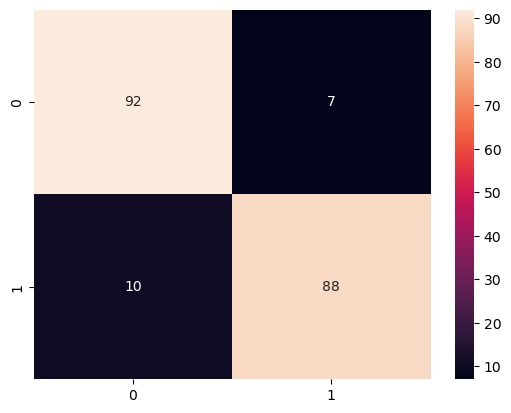

In [149]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True)

In [154]:
credit.duplicated().any()

False

In [155]:
credit=credit.drop_duplicates()

In [156]:
credit.shape

(283726, 31)

In [157]:
284807 -283726

1081

# Training and testing 

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [136]:
X_train_prediction=dt.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [114]:
print(np.sum(Y))
print(np.sum(Y_train))
print(np.sum(Y_test))

492
394
98


In [115]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [116]:
cols= list(X.columns.values)

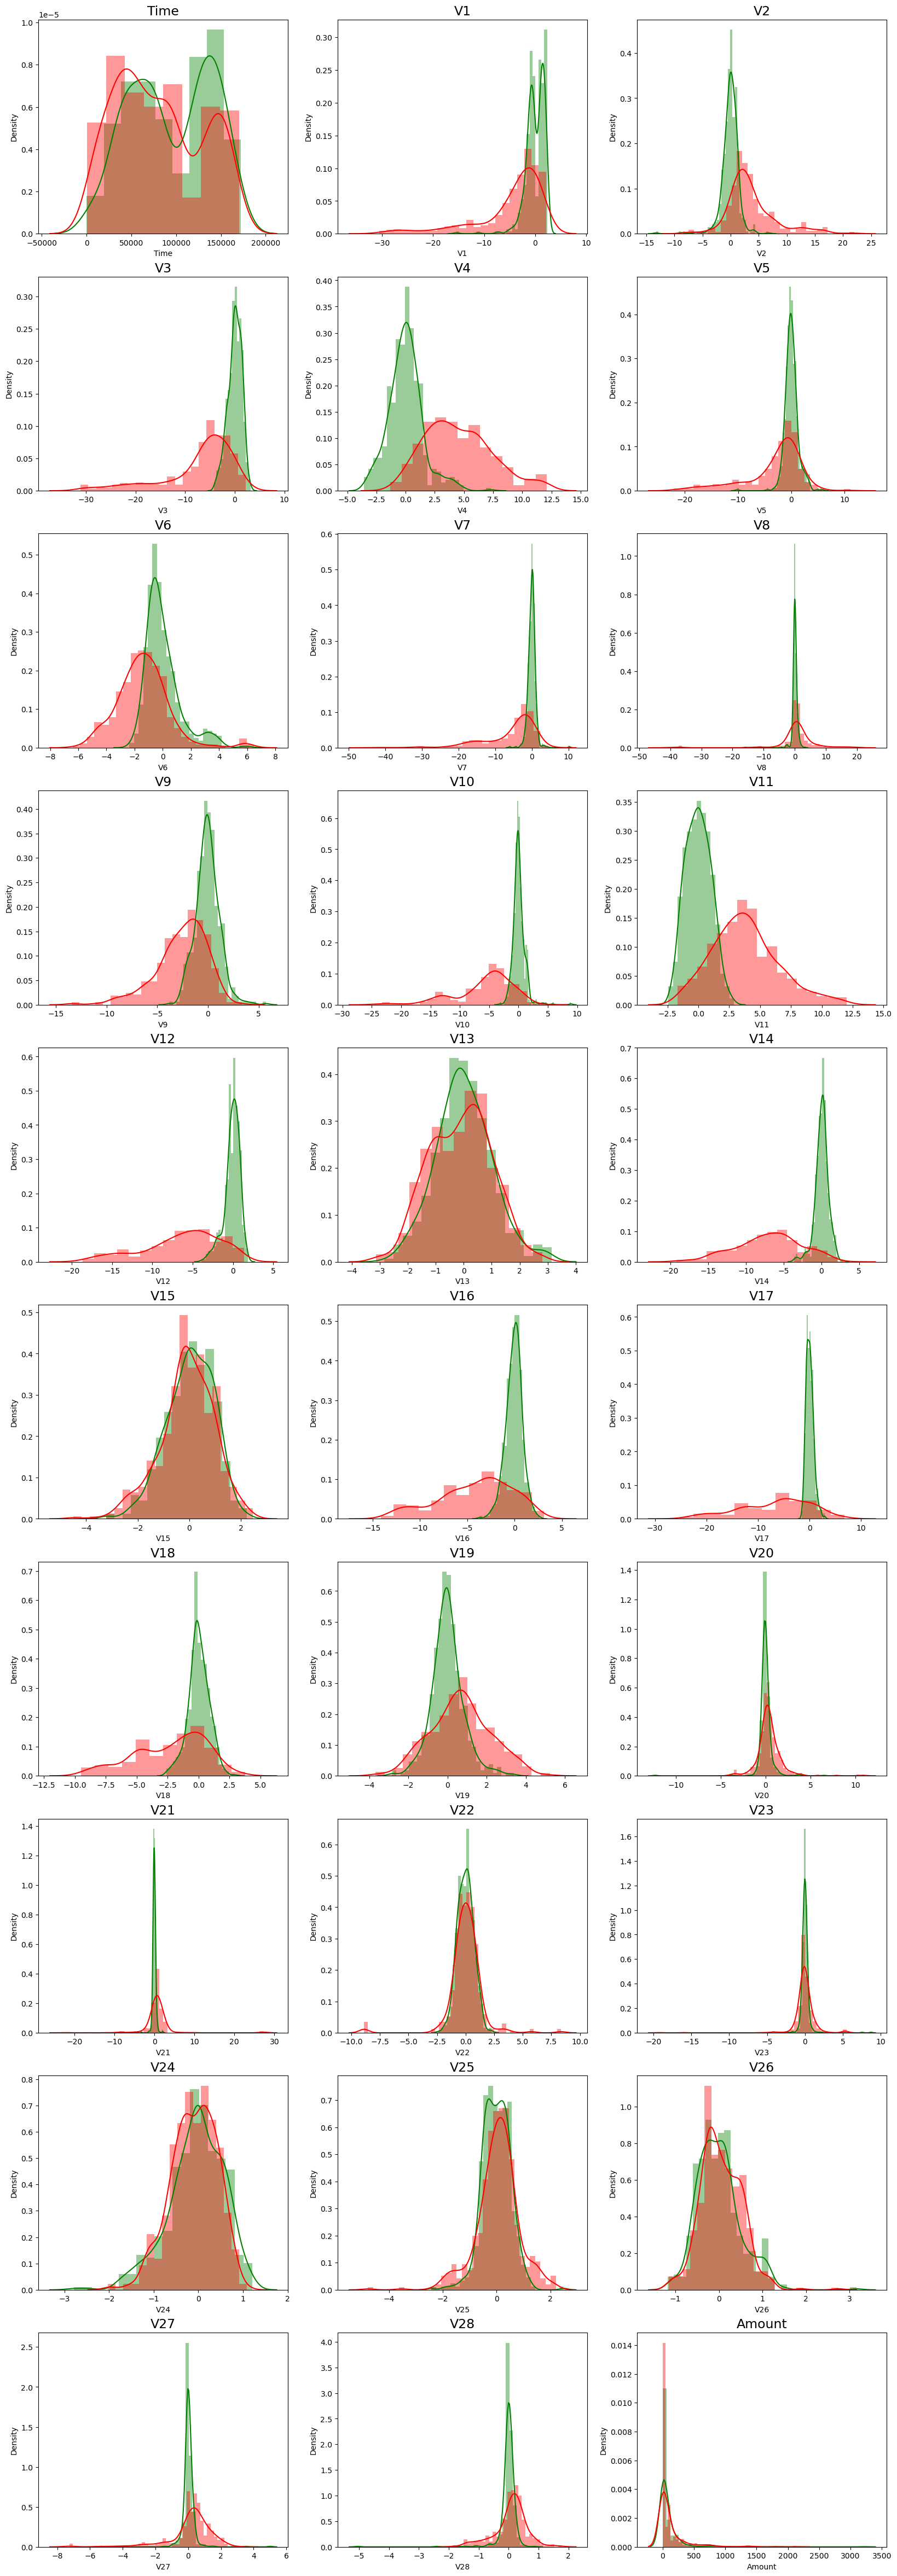

In [117]:
normal_rec=credit.Class == 0
fraud_rec=credit.Class == 1

plt.figure(figsize=(20,60))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_rec], color='green')
    sns.distplot(X[col][fraud_rec], color='red')
    plt.title(col, fontsize=17)
plt.show()

# Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [194]:
model = LogisticRegression

In [217]:
#training the logistic regression model 
model.fit(X_train, Y_train)

LogisticRegression(C=0.01)

In [211]:
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, roc_auc_score

In [241]:
results = pd.DataFrame(columns=['Model_name', 'Accuracy', 'F1-Score', 'ROC'])

In [258]:
model = LogisticRegression(C=0.01)

In [260]:
logistic_model= model.fit(X_train, Y_train)

In [271]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, roc_auc_score

def display_test_results(model_name, model):
    Y_test_pred = model.predict(X_test)
    
    print("-----------Confusion Matrix-------------")
    c_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)
    print(c_matrix)

    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    
    print("------------Classification Report-------------")
    print(classification_report(Y_test, Y_test_pred))
    print("-----------------More Specific classification_report------------------")
    TP = c_matrix[1, 1]
    TN = c_matrix[0, 0]
    FP = c_matrix[0, 1]
    FN = c_matrix[1, 0]

    print("Accuracy:", metrics.accuracy_score(Y_test, Y_test_pred))
    print("Sensitivity:", TP / float(TP + FN))
    print("Specificity:", TN / float(TN + FP))
    print("F1-Score:", f1_score(Y_test, Y_test_pred))
    
    Y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    print("------------------ROC-----------------------")
    roc_auc = roc_auc_score(Y_test, Y_test_pred_proba)

    # Plotting ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_pred_proba)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    results.loc[len(results)] = [model_name, metrics.accuracy_score(Y_test, Y_test_pred), f1_score(Y_test, Y_test_pred), roc_auc]
    
    return None


-----------Confusion Matrix-------------
[[95  4]
 [14 84]]


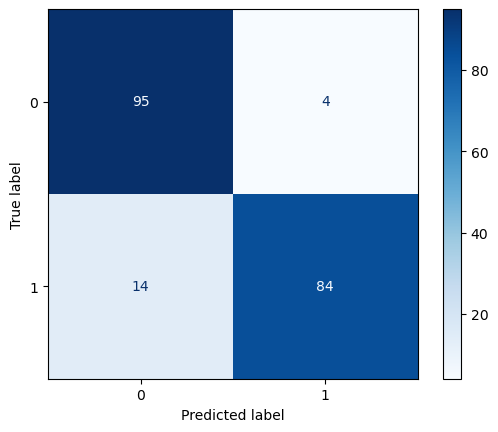

------------Classification Report-------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        99
           1       0.95      0.86      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

-----------------More Specific classification_report------------------
Accuracy: 0.9086294416243654
Sensitivity: 0.8571428571428571
Specificity: 0.9595959595959596
F1-Score: 0.9032258064516128
------------------ROC-----------------------


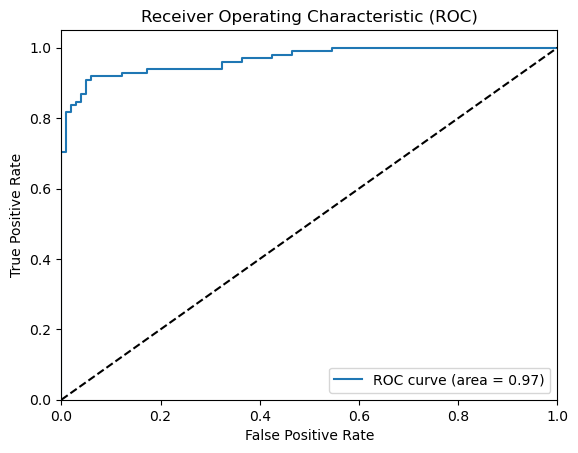

In [272]:
display_test_results("Logistic Regression", logistic_model)

# Random Forest Algorithm

In [273]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
random_forest_model = RandomForestClassifier(bootstrap=True,
                                             max_depth=5,
                                             min_samples_leaf=50,
                                             min_samples_split=50,
                                             max_features=10,
                                             n_estimators=100)

In [275]:
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

-----------Confusion Matrix-------------
[[95  4]
 [14 84]]


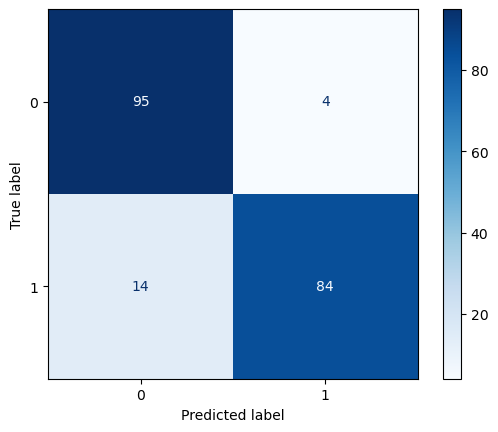

------------Classification Report-------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        99
           1       0.95      0.86      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

-----------------More Specific classification_report------------------
Accuracy: 0.9086294416243654
Sensitivity: 0.8571428571428571
Specificity: 0.9595959595959596
F1-Score: 0.9032258064516128
------------------ROC-----------------------


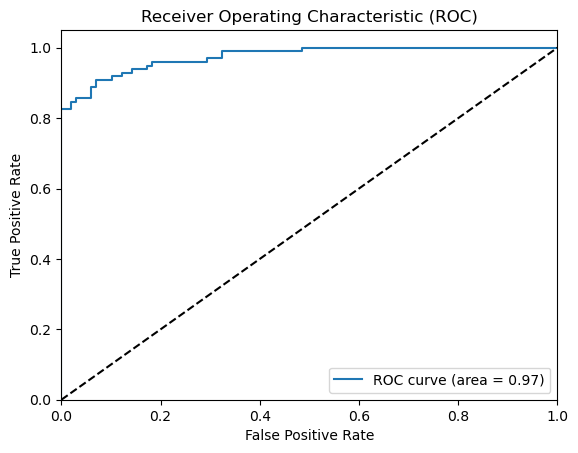

In [276]:
display_test_results("Random Forest", random_forest_model)

# Decision Tree Classifier

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
decision_tree_model = DecisionTreeClassifier(criterion = 'gini',
                                             random_state =100,
                                             max_depth=5,
                                             min_samples_leaf=100,
                                             min_samples_split=100)
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

-----------Confusion Matrix-------------
[[94  5]
 [16 82]]


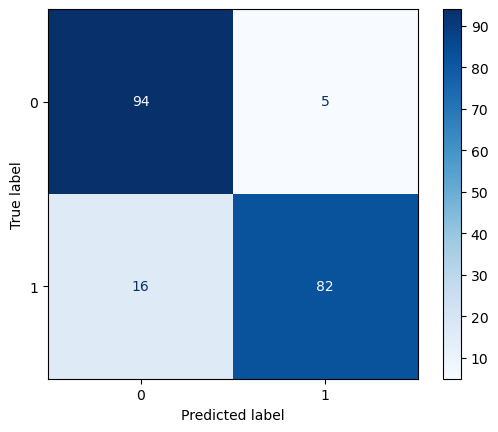

------------Classification Report-------------
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        99
           1       0.94      0.84      0.89        98

    accuracy                           0.89       197
   macro avg       0.90      0.89      0.89       197
weighted avg       0.90      0.89      0.89       197

-----------------More Specific classification_report------------------
Accuracy: 0.8934010152284264
Sensitivity: 0.8367346938775511
Specificity: 0.9494949494949495
F1-Score: 0.8864864864864864
------------------ROC-----------------------


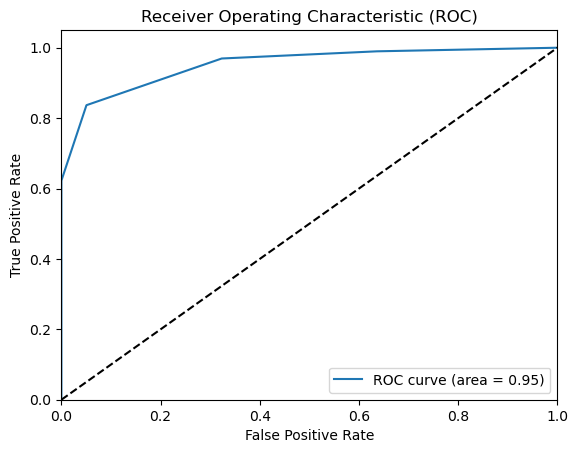

In [280]:
display_test_results("Decision Tree", decision_tree_model)

# Summary

In [282]:
results.sort_values(by="ROC", ascending=False)

,Model_name,Accuracy,F1-Score,ROC
1,Random Forest,0.908629,0.903226,0.974129
0,Logistic Regression,0.908629,0.903226,0.966708
2,Decision Tree,0.893401,0.886486,0.951659
